# Understanding Summary


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv("sales-data-samples.csv") #import .csv files

df.head()

,OrderDate,Category,City,Country,CustomerName,Discount,OrderID,PostalCode,ProductName,Profit,...,DaystoShipActual,SalesForecast,ShipStatus,DaystoShipScheduled,OrderProfitable,SalesperCustomer,ProfitRatio,SalesaboveTarget,latitude,longitude
0,2011-01-04T00:00:00.000Z,Office Supplies,Houston,United States,Darren Powers,0.2,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2 X 4 Forms/...",6,...,4,22,Shipped Early,6,NaN,16.45,33.8,NaN,29.8941,-95.6481
1,2011-01-05T00:00:00.000Z,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,Avery 508,4,...,4,15,Shipped Early,6,NaN,11.78,36.3,NaN,41.7662,-88.1410
2,2011-01-05T00:00:00.000Z,Office Supplies,Naperville,United States,Phillina Ober,0.8,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,-5,...,4,5,Shipped Early,6,NaN,3.54,-155.0,NaN,41.7662,-88.1410
3,2011-01-05T00:00:00.000Z,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,-65,...,4,357,Shipped Early,6,NaN,272.74,-23.8,NaN,41.7662,-88.1410
4,2011-01-06T00:00:00.000Z,Office Supplies,Philadelphia,United States,Mick Brown,0.2,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,5,...,7,26,Shipped Late,6,NaN,19.54,25.0,NaN,39.9448,-75.2288


In [ ]:
print(f"Dataset shape: {df.shape}")  # (rows, columns)

Dataset shape: (9994, 28)


In [ ]:
df.info()  # Shows column names, non-null counts, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OrderDate            9994 non-null   object 
 1   Category             9994 non-null   object 
 2   City                 9994 non-null   object 
 3   Country              9994 non-null   object 
 4   CustomerName         9994 non-null   object 
 5   Discount             9994 non-null   float64
 6   OrderID              9994 non-null   object 
 7   PostalCode           9994 non-null   int64  
 8   ProductName          9994 non-null   object 
 9   Profit               9994 non-null   int64  
 10  Quantity             9994 non-null   int64  
 11  Region               9994 non-null   object 
 12  Sales                9994 non-null   int64  
 13  Segment              9994 non-null   object 
 14  ShipDate             9994 non-null   object 
 15  ShipMode             9994 non-null   o

# Data Cleaning and Preprocessing

In [ ]:
# Convert dates to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['ShipDate'] = pd.to_datetime(df['ShipDate'])


df.dtypes

,0
OrderDate,"datetime64[ns, UTC]"
Category,object
City,object
Country,object
CustomerName,object
Discount,float64
OrderID,object
PostalCode,int64
ProductName,object
Profit,int64


In [ ]:
print(df.isnull().sum())




OrderDate                 0
Category                  0
City                      0
Country                   0
CustomerName              0
Discount                  0
OrderID                   0
PostalCode                0
ProductName               0
Profit                    0
Quantity                  0
Region                    0
Sales                     0
Segment                   0
ShipDate                  0
ShipMode                  0
State                     0
Sub_Category              0
DaystoShipActual          0
SalesForecast             0
ShipStatus                0
DaystoShipScheduled       0
OrderProfitable        9994
SalesperCustomer          0
ProfitRatio               0
SalesaboveTarget       9994
latitude                  0
longitude                 0
dtype: int64


In [ ]:
print(df.duplicated().sum())

1


In [ ]:
df.dtypes

,0
OrderDate,"datetime64[ns, UTC]"
Category,object
City,object
Country,object
CustomerName,object
Discount,float64
OrderID,object
PostalCode,int64
ProductName,object
Profit,int64


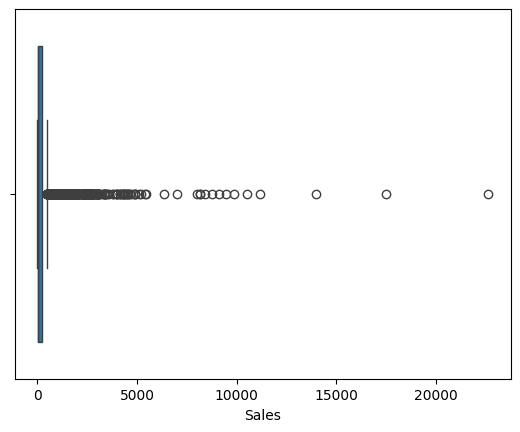

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x=df['Sales'])
plt.show()

In [ ]:
# Clean numeric fields
numeric_cols = ['Sales', 'Profit', 'Discount', 'Quantity', 'DaystoShipActual', 'DaystoShipScheduled', 'SalesForecast']
for col in numeric_cols:
   df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Fix negative shipping days
df['DaystoShipActual'] = df['DaystoShipActual'].abs()

In [ ]:
# Create derived features
df['ShippingDelay'] = df['DaystoShipActual'] - df['DaystoShipScheduled']
df['ProfitRatio'] = df['Profit'] / df['Sales']
df['OrderMonth'] = df['OrderDate'].dt.month
df['OrderYear'] = df['OrderDate'].dt.year

df

,OrderDate,Category,City,Country,CustomerName,Discount,OrderID,PostalCode,ProductName,Profit,...,DaystoShipScheduled,OrderProfitable,SalesperCustomer,ProfitRatio,SalesaboveTarget,latitude,longitude,ShippingDelay,OrderMonth,OrderYear
0,2011-01-04 00:00:00+00:00,Office Supplies,Houston,United States,Darren Powers,0.2,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2 X 4 Forms/...",6,...,6,NaN,16.45,0.375000,NaN,29.8941,-95.6481,-2,1,2011
1,2011-01-05 00:00:00+00:00,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,Avery 508,4,...,6,NaN,11.78,0.333333,NaN,41.7662,-88.1410,-2,1,2011
2,2011-01-05 00:00:00+00:00,Office Supplies,Naperville,United States,Phillina Ober,0.8,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,-5,...,6,NaN,3.54,-1.250000,NaN,41.7662,-88.1410,-2,1,2011
3,2011-01-05 00:00:00+00:00,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,-65,...,6,NaN,272.74,-0.238095,NaN,41.7662,-88.1410,-2,1,2011
4,2011-01-06 00:00:00+00:00,Office Supplies,Philadelphia,United States,Mick Brown,0.2,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,5,...,6,NaN,19.54,0.250000,NaN,39.9448,-75.2288,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-12-31 00:00:00+00:00,Office Supplies,Fairfield,United States,Erica Bern,0.2,CA-2014-115427,94533,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",5,...,6,NaN,13.90,0.357143,NaN,38.2671,-122.0357,-2,12,2014
9990,2014-12-31 00:00:00+00:00,Office Supplies,Fairfield,United States,Erica Bern,0.2,CA-2014-115427,94533,GBC Binding covers,6,...,6,NaN,20.72,0.285714,NaN,38.2671,-122.0357,-2,12,2014
9991,2014-12-31 00:00:00+00:00,Office Supplies,Loveland,United States,Jill Matthias,0.2,CA-2014-156720,80538,Bagged Rubber Bands,-1,...,6,NaN,3.02,-0.333333,NaN,40.4262,-105.0900,-2,12,2014
9992,2014-12-31 00:00:00+00:00,Office Supplies,New York City,United States,Patrick ODonnell,0.2,CA-2014-143259,10009,Wilson Jones Legal Size Ring Binders,20,...,6,NaN,52.78,0.377358,NaN,40.7262,-73.9796,-2,12,2014


In [ ]:

# Sample datetime64[ns, UTC] column
df['OrderDate'] = pd.to_datetime(df['OrderDate'], utc=True)

# Convert to date only (drops time and timezone info)
df['OrderDate'] = df['OrderDate'].dt.date

# Similarly for ShipDate
df['ShipDate'] = pd.to_datetime(df['ShipDate'], utc=True).dt.date

In [ ]:
cleaned_df = df
cleaned_df.to_csv('cleaned_sales_data.csv', index=False)

In [ ]:
from google.colab import files


files.download('cleaned_sales_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>